In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Some notes on my terminology:

- A probability is the proportion of a given column label to the total number of columns.

In [76]:
def entropy(probabilities):
    
    p = probabilities
    entropy = sum(-p * np.log2(p) for p in probabilities if p)
    return entropy
    

In [66]:
# def entropy(probabilities):
#     """Return the entropy for a given class."""
#     return [-p[0] * np.log2(p[0]) - (p[1]) * np.log2(p[1]) for p in probabilities]

In [79]:
def class_probabilities(table):
    """Returns the p for each column"""
    return [table[column].value_counts(normalize=True).values for column in table]
    

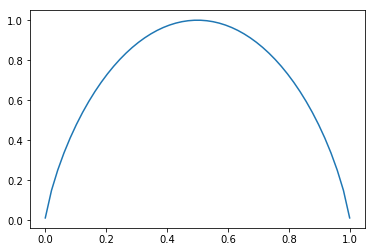

In [82]:
x = np.linspace(0.001, 0.999)
y = -x * np.log2(x) - (1 - x) * np.log2(1 - x)
plt.plot(x, y)
plt.show()

The following list of dictionaries is a common data set used in the explanation of decision trees and the ID3 algorithm.

In [84]:
golf = [{"outlook": "Rainy", "temp": "Hot", "humidity": "High", "windy": False, "golf": False},
 {"outlook": "Rainy", "temp": "Hot", "humidity": "High", "windy": True, "golf": False},
 {"outlook": "Overcast", "temp": "Hot", "humidity": "High", "windy": False, "golf": True},
 {"outlook": "Sunny", "temp": "mild", "humidity": "High", "windy": False, "golf": True},
 {"outlook": "Sunny", "temp": "Cool", "humidity": "Normal", "windy": False, "golf": True},
 {"outlook": "Sunny", "temp": "Cool", "humidity": "Normal", "windy": True, "golf": False},
 {"outlook": "Overcast", "temp": "Cool", "humidity": "Normal", "windy": True, "golf": True},
 {"outlook": "Rainy", "temp": "mild", "humidity": "High", "windy": False, "golf": False},
 {"outlook": "Rainy", "temp": "Cool", "humidity": "Normal", "windy": False, "golf": True},
 {"outlook": "Sunny", "temp": "mild", "humidity": "Normal", "windy": False, "golf": True},
 {"outlook": "Rainy", "temp": "mild", "humidity": "Normal", "windy": True, "golf": True},
 {"outlook": "Overcast", "temp": "mild", "humidity": "High", "windy": True, "golf": True},
 {"outlook": "Overcast", "temp": "Hot", "humidity": "Normal", "windy": False, "golf": True},
 {"outlook": "Sunny", "temp": "mild", "humidity": "High", "windy": True, "golf": False}
]

golf = pd.DataFrame(golf)

In [85]:
golf

,golf,humidity,outlook,temp,windy
0,False,High,Rainy,Hot,False
1,False,High,Rainy,Hot,True
2,True,High,Overcast,Hot,False
3,True,High,Sunny,mild,False
4,True,Normal,Sunny,Cool,False
5,False,Normal,Sunny,Cool,True
6,True,Normal,Overcast,Cool,True
7,False,High,Rainy,mild,False
8,True,Normal,Rainy,Cool,False
9,True,Normal,Sunny,mild,False


In [110]:
golf[['outlook', 'golf']]

,outlook,golf
0,Rainy,False
1,Rainy,False
2,Overcast,True
3,Sunny,True
4,Sunny,True
5,Sunny,False
6,Overcast,True
7,Rainy,False
8,Rainy,True
9,Sunny,True


*Gain* is the the amount of information gained after dividing a subset. 

The golf table above is our main data set, also know as *S*. Each column header of the table is an *attribute*. Each piece of data within the column is a *class* (Since we're making a decision tree *class*ifier, it makes sense that each piece of data is a *class*). Each column can have a different class, depending on what kind of information is given for each attribute. The *target*, sometimes referred as a label, is the decision we're ultimately trying to make. Our main data and all of the subsets will be used to make this decision. For our data above:

**golf** is the whole data set, ak *S*
**'outlook'** is an *attribute*
**'Rainy, Overcast,** and **Sunny** are *classes*
**'golf'** is the *target*, as we're trying to predict whether someone will golf given these conditions.




$Gainentropy(target) - (probability of class_1 within subset) * entropy(proportion of target classes within class of subset) - (probability of class_2 within subset) * entropy(proportion of target classes within subset) 

In [86]:
probs = class_probabilities(golf)
probs

[array([ 0.64285714,  0.35714286]),
 array([ 0.5,  0.5]),
 array([ 0.35714286,  0.35714286,  0.28571429]),
 array([ 0.42857143,  0.28571429,  0.28571429]),
 array([ 0.57142857,  0.42857143])]

In [146]:
probability_golf_rainy = (golf['golf'].where(golf['outlook'] == 'Rainy')
                                      .value_counts(normalize=True))
probability_golf_overcast = (golf['golf'].where(golf['outlook'] == 'Overcast')
                                         .value_counts(normalize=True))
probability_golf_sunny = (golf['golf'].where(golf['outlook'] == 'Sunny')
                                      .value_counts(normalize=True))

In [149]:
probability_golf_rainy

0.0    0.6
1.0    0.4
Name: golf, dtype: float64

In [130]:
entropy_of_target = entropy(probs[0])  #  Essentially the entropy of the entire data set

In [131]:
# Outlook
probability_rainy = probs[2][0]
probability_sunny = probs[2][1]
probability_overcast = probs[2][2]


In [154]:
weighted_entropy_rainy = probability_rainy * entropy(probability_golf_rainy)

In [155]:
weighted_entropy_sunny = probability_sunny * entropy(probability_golf_sunny)

In [156]:
weighted_entropy_sunny

0.34676806944809591

In [157]:
weighted_entropy_overcast = probability_overcast * entropy(probability_golf_overcast)

In [158]:
weighted_entropy_overcast

0.0

In [162]:
gain = (entropy_of_target -
        weighted_entropy_overcast -
        weighted_entropy_rainy -
        weighted_entropy_sunny)

In [163]:
gain

0.24674981977443911